# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['main']['all']
        city_wind = city_weather['clouds']['speed']
        city_country = city_weather['wind']['country']
        city_date = city_weather['coord']['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 1 | shingu
City not found. Skipping...
Processing Record 3 of Set 1 | anadyr
City not found. Skipping...
Processing Record 4 of Set 1 | grindavik
City not found. Skipping...
Processing Record 5 of Set 1 | redmond
City not found. Skipping...
Processing Record 6 of Set 1 | hilo
City not found. Skipping...
Processing Record 7 of Set 1 | forio
City not found. Skipping...
Processing Record 8 of Set 1 | aporawan
City not found. Skipping...
Processing Record 9 of Set 1 | vaini
City not found. Skipping...
Processing Record 10 of Set 1 | vilyuysk
City not found. Skipping...
Processing Record 11 of Set 1 | itarema
City not found. Skipping...
Processing Record 12 of Set 1 | east london
City not found. Skipping...
Processing Record 13 of Set 1 | rikitea
City not found. Skipping...
Processing Record 14 of Set 1 | pelym
City not foun

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


Series([], dtype: int64)

In [5]:
# Display sample data
city_data_df.head()

""


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

PermissionError: [Errno 13] Permission denied: 'output_data/cities.csv'

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

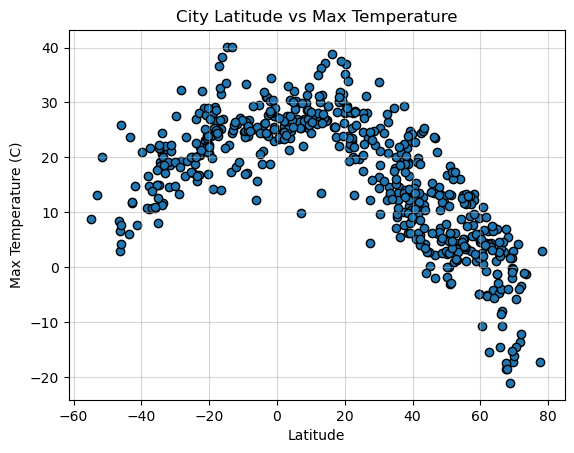

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

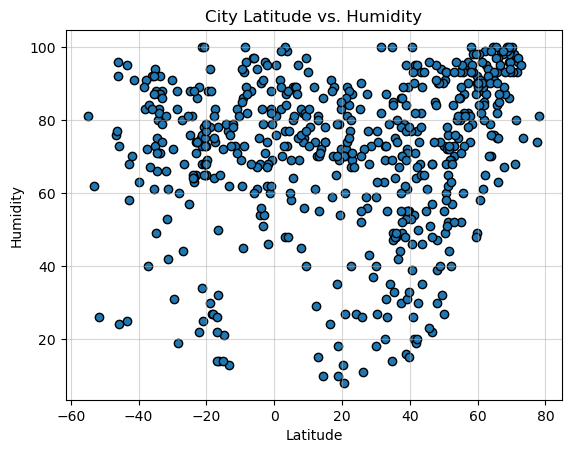

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

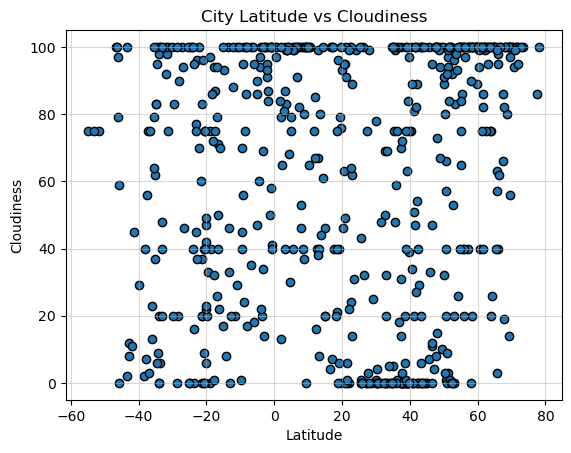

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

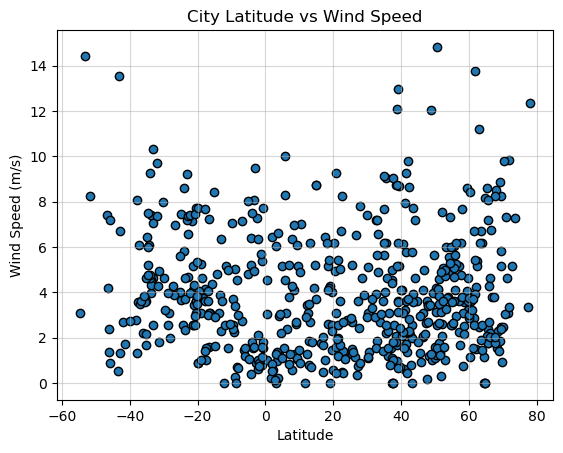

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


pvalue
rvalue


FileNotFoundError: [Errno 2] No such file or directory: '/images/Fig4_2.png'

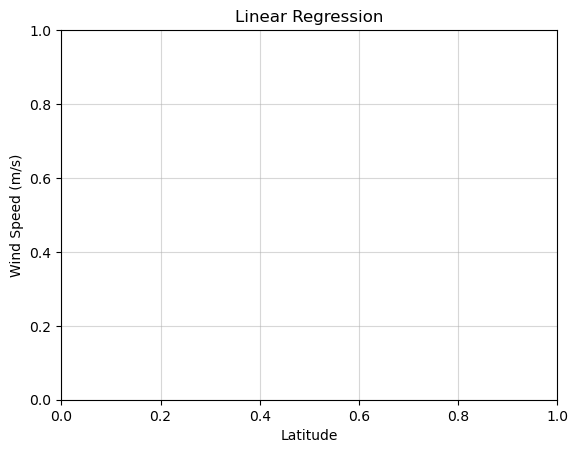

In [24]:
# Define a function to create Linear Regression plots
def linearRegression(x_values, y_values, annotate_loc, title, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq, annotate_loc,fontsize=15,color="red")

# Adding previous graph properties
plt.title('Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(alpha=0.5)

print("pvalue")
print("rvalue")

# save
plt.savefig("../images/Fig4_2.png")

# Plot show
plt.show()

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_def = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_def = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


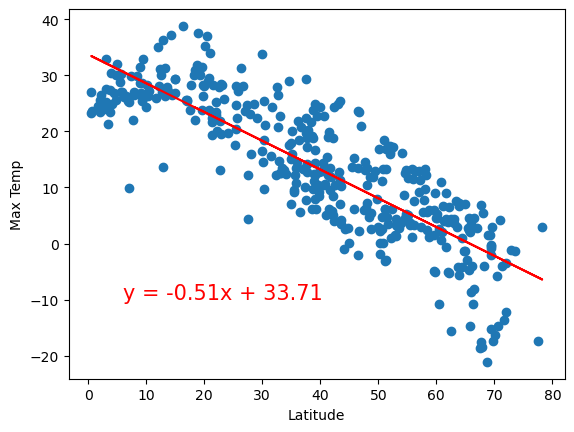

In [ ]:
# Linear regression on Northern Hemisphere
linearRegression(northern_hemi_def["lat"], northern_hemi_def["Max Temp"], (10, -30), "Northern Hemisphere vs Max Temperature", 'Latitude', 'Max Temperature (C)')

The r-value is: 0.4121057168607245


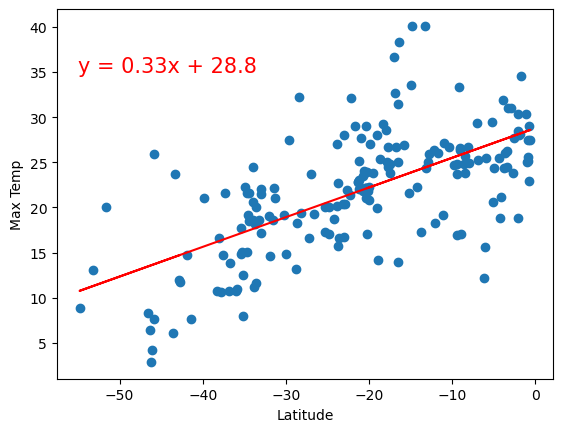

In [ ]:
# Linear regression on Southern Hemisphere
linearRegression(southern_hemi_def["Lat"], southern_hemi_def["Max Temp"], (-30, 10), "Southern Hemisphere vs Max Temp", 'Latitude', 'Max Temperature (C)')

**Discussion about the linear relationship:** Both scatter plots showed correlations between the temperature of the city when compared to the city's latitude. In the northern hemisphere, there was a negative correlation, showing that the further north you went the colder it becomes. Whereas in the southern hemisphere, there was a positive correlation, showing that the further south you went the warmer it becomes

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


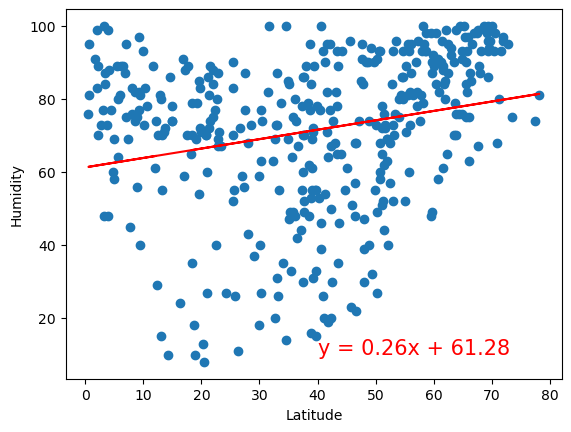

In [ ]:
# Northern Hemisphere
linearRegression(northern_hemi_def["Lat"], northern_hemi_def["Humidity"], (46, 20), "Northern Hemisphere vs Humidity", 'Latitude', 'Humidity (%)')

The r-value is: 0.0002808747046324607


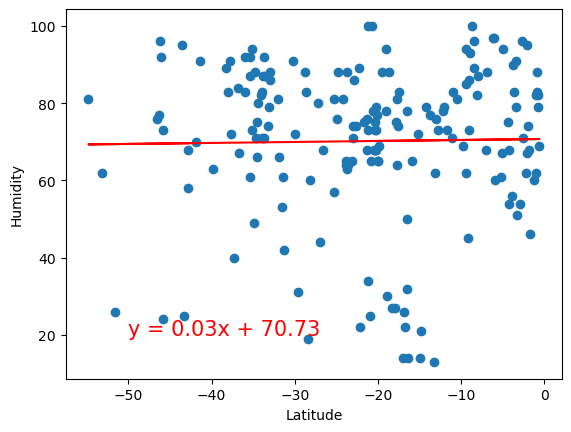

In [ ]:
# Southern Hemisphere
linearRegression(southern_hemi_def["Lat"], southern_hemi_def["Humidity"], (-55, 10), "Southern Hemisphere vs Humidity", 'Latitude', 'Humidity (%)')

**Discussion about the linear relationship:** Both scatter plots had a low r-value, displaying that there was little to no relationship between the latitude of the cities and their humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


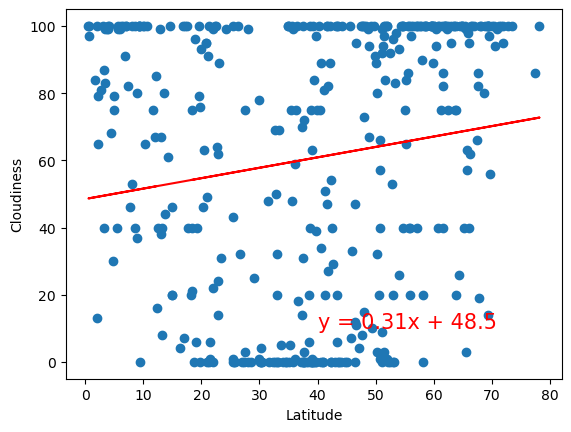

In [ ]:
# Northern Hemisphere
linearRegression(northern_hemi_def["Lat"], northern_hemi_def["Cloudiness"], (45, 25), "Northern Hemisphere vs Cloudiness", 'Latitude', 'Cloudiness (%)')

The r-value is: 0.02056735429994368


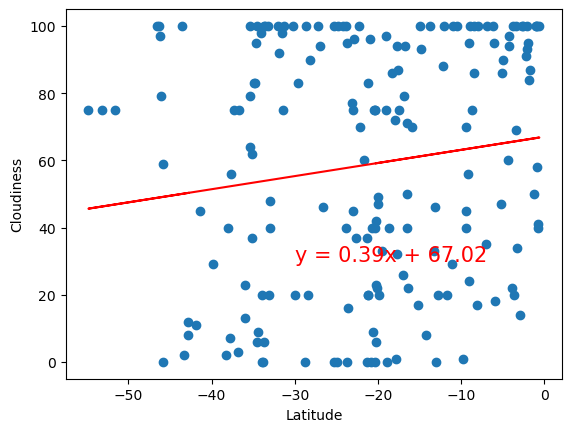

In [ ]:
# Southern Hemisphere
linearRegression(southern_hemi_def["Lat"], southern_hemi_def["Cloudiness"], (-56, 15), "Northern Hemisphere vs Cloudiness", 'Latitude', 'Cloudiness (%)')

**Discussion about the linear relationship:** Both the northern and southern scatter plots had low r-values, showing that there is no relationship between the cloudiness of a city and its latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


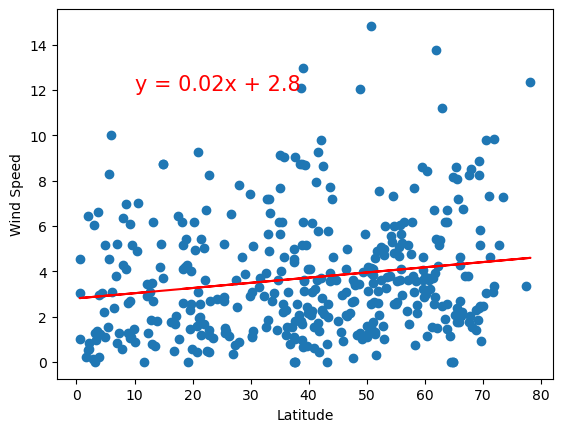

In [ ]:
# Northern Hemisphere
linearRegression(northern_hemi_def["Lat"], northern_hemi_def["Wind Speed"], (5, 12), "Northern Hemisphere vs Wind Speed", 'Latitude', 'Wind Speed (m/s')

The r-value is: 0.062239040700515696


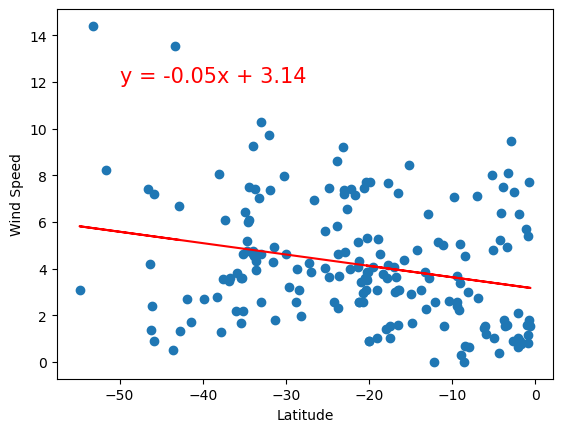

In [ ]:
# Southern Hemisphere
linearRegression(southern_hemi_def["Lat"], southern_hemi_def["Wind Speed"], (-55, 10), "Southern Hemisphere vs Wind Speed", 'Latitude', 'Wind Speed (m/s')

**Discussion about the linear relationship:** Both northern and southern plots had low r-values and the display shows that there is no relationship between the wind speed of a city and its latitude.